In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import MyBasis as mB
import Hubb as Hb
import math
import CompareStrings as CS
import nfile as nf
m = 3 # number of nodes
dimens = m*m # dimension of status 
nmax = 1
N = 1 # number particles 
mu = 0 # chemical potential < 0 ( + in Hubbard )
V = 0 # non-magnetic impurities
t = 1 # amplitude of jump
delta = 0 # amplitude of pairing 
sum1 = -t*math.sqrt(2)


In [5]:
z = mB.Basis(dimens,nmax,N)
B = z.Basis2() 
print(B)
H = np.zeros((dimens,dimens))



[[0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]


[[ 0.         -1.41421356 -1.41421356 -1.41421356  0.          0.
  -1.41421356  0.          0.        ]
 [-1.41421356  0.         -1.41421356  0.         -1.41421356  0.
   0.         -1.41421356  0.        ]
 [-1.41421356 -1.41421356  0.          0.          0.         -1.41421356
   0.          0.         -1.41421356]
 [-1.41421356  0.          0.          0.         -1.41421356 -1.41421356
  -1.41421356  0.          0.        ]
 [ 0.         -1.41421356  0.         -1.41421356  0.         -1.41421356
   0.         -1.41421356  0.        ]
 [ 0.          0.         -1.41421356 -1.41421356 -1.41421356  0.
   0.          0.         -1.41421356]
 [-1.41421356  0.          0.         -1.41421356  0.          0.
   0.         -1.41421356 -1.41421356]
 [ 0.         -1.41421356  0.          0.         -1.41421356  0.
  -1.41421356  0.         -1.41421356]
 [ 0.          0.         -1.41421356  0.          0.         -1.41421356
  -1.41421356 -1.41421356  0.        ]]


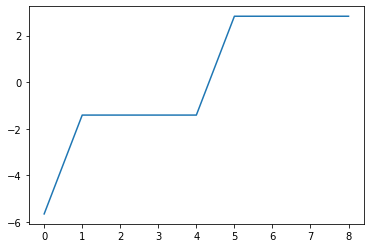

In [6]:
# поиск соседей 
d = Hb.Hubbard(m)
for p in range(m):
    for s in range(m):
        setka = np.zeros((m,m))
        setka[p][s] = 1
        str_start = nf.matrix_number(setka)
        particle = [p,s]
        y = d.neighbours(particle)
        #print(y)

        str1 = []
        str2 = []
        str3 = []
        str4 = []
        for i in range(len(y)):
            setka = np.zeros((m,m))
            setka[y[i][0]][y[i][1]] = 1
            #print(setka)
            for k in range(len(setka)):
                for j in range(len(setka)):
                    if i == 1:
                        str1.append(setka[k][j])
                    elif i == 2:
                        str2.append(setka[k][j])
                    elif i == 3:
                        str3.append(setka[k][j])
                    else:
                        str4.append(setka[k][j])

        k1 = CS.CompareStrings(str1,B)
        k2 = CS.CompareStrings(str2,B)
        k3 = CS.CompareStrings(str3,B)
        k4 = CS.CompareStrings(str4,B)
        
        i = CS.CompareStrings(str_start,B)
                    

                    
        H[i][k1] += sum1
        H[i][k2] += sum1
        H[i][k3] += sum1
        H[i][k4] += sum1

print(H)

E,C = np.linalg.eig(H)

plt.plot(sorted(E))


